# Model Selection and Testing

In [438]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, precision_recall_curve, f1_score, roc_curve, roc_auc_score, log_loss
from sklearn.inspection import permutation_importance

## Baseline model

In [2]:
df_mf_train = pd.read_csv('../Data/df_mf_train.csv')

In [3]:
df_mf_train.head()

,Ticker,Morningstar Sustainability Rating,Average Market Cap ($ mil),ROE Last Year (%),Debt/Capital Last Year (%),No. of Holdings in Portfolio,% Assets in Top 10 Holdings,Turnover Ratio (%),Average Manager Tenure (years),Expense Ratio (%),Minimum Initial Purchase ($),Total Assets ($ mil),3-year Annualized Return vs. S&P500,Outperform / Underperform,No-load Funds,Closed to New Investors
0,VFTNX,4,183202,28.22,45.19,470,30.13,18,5,0.12,5000000,10798,4.48,1,1,0
1,JCNNX,1,19870,10.25,48.60,45,44.05,68,4,0.58,1000000,3785,7.61,1,1,0
2,PMJPX,4,1830,0.62,46.75,782,12.57,202,6,0.63,1000000,552,-4.02,0,1,0
3,WMICX,2,1264,-6.53,30.18,75,25.07,75,10,1.66,2000,1410,23.85,1,1,0
4,STAEX,3,178923,24.25,45.50,39,47.94,16,8,1.02,1000,287,9.69,1,0,0


In [4]:
X_train_base = df_mf_train.drop(['Ticker','3-year Annualized Return vs. S&P500','Outperform / Underperform'], axis=1)
y_train_base = df_mf_train['Outperform / Underperform']

### Logistic regression

#### Gridsearch

In [5]:
param_grid_log = {'C': [10, 100, 1000, 2000]} 

In [6]:
grid_log = GridSearchCV(LogisticRegression(max_iter=1000),param_grid_log,refit=True,n_jobs=-1)

In [7]:
grid_log.fit(X_train_base,y_train_base)

GridSearchCV(estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [10, 100, 1000, 2000]})

In [8]:
grid_log.best_params_

{'C': 100}

In [9]:
accuracy_cv_log = cross_val_score(grid_log, X_train_base, y_train_base, cv=5, scoring='accuracy',n_jobs=-1).mean()

In [10]:
accuracy_cv_log

0.548863476739583

In [11]:
precision_cv_log = cross_val_score(grid_log, X_train_base, y_train_base, cv=5, scoring='precision',n_jobs=-1).mean()

In [12]:
precision_cv_log

0.5229604825070912

In [13]:
recall_cv_log = cross_val_score(grid_log, X_train_base, y_train_base, cv=5, scoring='recall',n_jobs=-1).mean()

In [14]:
recall_cv_log

0.7089285714285715

In [15]:
f1_cv_log = cross_val_score(grid_log, X_train_base, y_train_base, cv=5, scoring='f1',n_jobs=-1).mean()

In [16]:
f1_cv_log

0.5642576071659363

In [17]:
roc_cv_log = cross_val_score(grid_log, X_train_base, y_train_base, cv=5, scoring='roc_auc',n_jobs=-1).mean()

In [18]:
roc_cv_log

0.6618769852745418

In [19]:
logloss_cv_log = -cross_val_score(grid_log, X_train_base, y_train_base, cv=5, scoring='neg_log_loss',n_jobs=-1).mean()

In [20]:
logloss_cv_log

0.651889957307697

### K nearest neighbors

In [21]:
scaler = StandardScaler()

In [22]:
X_train_base_scaled = scaler.fit_transform(X_train_base)

#### Gridsearch

In [23]:
param_grid_knn = {'n_neighbors': range(1,11), 'weights': ['uniform', 'distance'], 'metric': ['euclidean','manhattan']} 

In [24]:
grid_knn = GridSearchCV(KNeighborsClassifier(),param_grid_knn,refit=True,n_jobs=-1)

In [25]:
grid_knn.fit(X_train_base_scaled,y_train_base)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(1, 11),
                         'weights': ['uniform', 'distance']})

In [26]:
grid_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}

In [27]:
accuracy_cv_knn = cross_val_score(grid_knn, X_train_base_scaled, y_train_base, cv=5, scoring='accuracy',n_jobs=-1).mean()

In [28]:
accuracy_cv_knn

0.9342926738944438

In [29]:
precision_cv_knn = cross_val_score(grid_knn, X_train_base_scaled, y_train_base, cv=5, scoring='precision',n_jobs=-1).mean()

In [30]:
precision_cv_knn

0.9273467693711389

In [31]:
recall_cv_knn = cross_val_score(grid_knn, X_train_base_scaled, y_train_base, cv=5, scoring='recall',n_jobs=-1).mean()

In [32]:
recall_cv_knn

0.9172619047619047

In [33]:
f1_cv_knn = cross_val_score(grid_knn, X_train_base_scaled, y_train_base, cv=5, scoring='f1',n_jobs=-1).mean()

In [34]:
f1_cv_knn

0.9221876452486321

In [35]:
roc_cv_knn = cross_val_score(grid_knn, X_train_base_scaled, y_train_base, cv=5, scoring='roc_auc',n_jobs=-1).mean()

In [36]:
roc_cv_knn

0.9643343406019629

In [37]:
logloss_cv_knn = -cross_val_score(grid_knn, X_train_base_scaled, y_train_base, cv=5, scoring='neg_log_loss',n_jobs=-1).mean()

In [38]:
logloss_cv_knn

0.9619182679286936

### Decision Tree 

#### Gridsearch

In [39]:
param_grid_dtree = {'criterion': ['gini','entropy'], 'max_depth': range(1,10), 'min_samples_split': range(1,5), 'min_samples_leaf': range(1,5)} 

In [40]:
grid_dtree = GridSearchCV(DecisionTreeClassifier(),param_grid_dtree,refit=True,n_jobs=-1)

In [41]:
grid_dtree.fit(X_train_base,y_train_base)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 5)})

In [42]:
grid_dtree.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [43]:
accuracy_cv_dtree = cross_val_score(grid_dtree, X_train_base, y_train_base, cv=5, scoring='accuracy',n_jobs=-1).mean()

In [44]:
accuracy_cv_dtree

0.9176141950478234

In [45]:
precision_cv_dtree = cross_val_score(grid_dtree, X_train_base, y_train_base, cv=5, scoring='precision',n_jobs=-1).mean()

In [46]:
precision_cv_dtree

0.9192286623476992

In [47]:
recall_cv_dtree = cross_val_score(grid_dtree, X_train_base, y_train_base, cv=5, scoring='recall',n_jobs=-1).mean()

In [48]:
recall_cv_dtree

0.8791666666666667

In [49]:
f1_cv_dtree = cross_val_score(grid_dtree, X_train_base, y_train_base, cv=5, scoring='f1',n_jobs=-1).mean()

In [50]:
f1_cv_dtree

0.9011902985256949

In [51]:
roc_cv_dtree = cross_val_score(grid_dtree, X_train_base, y_train_base, cv=5, scoring='roc_auc',n_jobs=-1).mean()

In [52]:
roc_cv_dtree

0.9512165286154948

In [53]:
logloss_cv_dtree = -cross_val_score(grid_dtree, X_train_base, y_train_base, cv=5, scoring='neg_log_loss',n_jobs=-1).mean()

In [54]:
logloss_cv_dtree

1.0070421652648507

### Random forest

#### Gridsearch

In [55]:
param_grid_rfc = {'bootstrap': [False],
              'max_depth': [1, 5, 10],
              'max_features': ['auto'],
              'min_samples_leaf': [1, 2],
              'min_samples_split': [2, 3],
              'n_estimators': [25, 50, 75]
             }

In [56]:
grid_rfc = GridSearchCV(RandomForestClassifier(),param_grid_rfc,refit=True,n_jobs=-1)

In [57]:
grid_rfc.fit(X_train_base,y_train_base)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [1, 5, 10],
                         'max_features': ['auto'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [25, 50, 75]})

In [58]:
grid_rfc.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 75}

In [59]:
accuracy_cv_rfc = cross_val_score(grid_rfc, X_train_base, y_train_base, cv=5, scoring='accuracy',n_jobs=-1).mean()

In [60]:
accuracy_cv_rfc

0.9557739212606469

In [61]:
precision_cv_rfc = cross_val_score(grid_rfc, X_train_base, y_train_base, cv=5, scoring='precision',n_jobs=-1).mean()

In [62]:
precision_cv_rfc

0.9735077984271918

In [63]:
recall_cv_rfc = cross_val_score(grid_rfc, X_train_base, y_train_base, cv=5, scoring='recall',n_jobs=-1).mean()

In [64]:
recall_cv_rfc

0.9166666666666666

In [65]:
f1_cv_rfc = cross_val_score(grid_rfc, X_train_base, y_train_base, cv=5, scoring='f1',n_jobs=-1).mean()

In [66]:
f1_cv_rfc

0.9430697162801838

In [67]:
roc_cv_rfc = cross_val_score(grid_rfc, X_train_base, y_train_base, cv=5, scoring='roc_auc',n_jobs=-1).mean()

In [68]:
roc_cv_rfc

0.9919392259265379

In [69]:
logloss_cv_rfc = -cross_val_score(grid_rfc, X_train_base, y_train_base, cv=5, scoring='neg_log_loss',n_jobs=-1).mean()

In [70]:
logloss_cv_rfc

0.15926254890118283

### Support Vector Machine

#### Gridsearch

In [71]:
param_grid_svc = {'C': [10, 100, 1000], 'gamma': [0.2,0.5,1], 'kernel': ['rbf']} 

In [72]:
grid_svc = GridSearchCV(SVC(),param_grid_svc,refit=True,n_jobs=-1)

In [73]:
grid_svc.fit(X_train_base_scaled,y_train_base)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [10, 100, 1000], 'gamma': [0.2, 0.5, 1],
                         'kernel': ['rbf']})

In [74]:
grid_svc.best_params_

{'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}

In [75]:
accuracy_cv_svc = cross_val_score(grid_svc, X_train_base_scaled, y_train_base, cv=5, scoring='accuracy',n_jobs=-1).mean()

In [76]:
accuracy_cv_svc

0.9064938257416134

In [77]:
precision_cv_svc = cross_val_score(grid_svc, X_train_base_scaled, y_train_base, cv=5, scoring='precision',n_jobs=-1).mean()

In [78]:
precision_cv_svc

0.9058583225873938

In [79]:
recall_cv_svc = cross_val_score(grid_svc, X_train_base_scaled, y_train_base, cv=5, scoring='recall',n_jobs=-1).mean()

In [80]:
recall_cv_svc

0.8702380952380953

In [81]:
f1_cv_svc = cross_val_score(grid_svc, X_train_base_scaled, y_train_base, cv=5, scoring='f1',n_jobs=-1).mean()

In [82]:
f1_cv_svc

0.8876564963022929

In [83]:
roc_cv_svc = cross_val_score(grid_svc, X_train_base_scaled, y_train_base, cv=5, scoring='roc_auc',n_jobs=-1).mean()

In [84]:
roc_cv_svc

0.9568196705132795

### Naive Bayes

#### Gridsearch

In [85]:
param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}

In [86]:
grid_nb = GridSearchCV(GaussianNB(),param_grid_nb,refit=True,n_jobs=-1)

In [87]:
grid_nb.fit(X_train_base,y_train_base)

GridSearchCV(estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [88]:
grid_nb.best_params_

{'var_smoothing': 6.579332246575682e-07}

In [89]:
accuracy_cv_nb = cross_val_score(grid_nb, X_train_base, y_train_base, cv=5, scoring='accuracy',n_jobs=-1).mean()

In [90]:
accuracy_cv_nb

0.6641308789538878

In [91]:
precision_cv_nb = cross_val_score(grid_nb, X_train_base, y_train_base, cv=5, scoring='precision',n_jobs=-1).mean()

In [92]:
precision_cv_nb

0.8177927058038701

In [93]:
recall_cv_nb = cross_val_score(grid_nb, X_train_base, y_train_base, cv=5, scoring='recall',n_jobs=-1).mean()

In [94]:
recall_cv_nb

0.26845238095238094

In [95]:
f1_cv_nb = cross_val_score(grid_nb, X_train_base, y_train_base, cv=5, scoring='f1',n_jobs=-1).mean()

In [96]:
f1_cv_nb

0.40381543356659283

In [97]:
roc_cv_nb = cross_val_score(grid_nb, X_train_base, y_train_base, cv=5, scoring='roc_auc',n_jobs=-1).mean()

In [98]:
roc_cv_nb

0.6197316953097028

In [99]:
logloss_cv_nb = -cross_val_score(grid_nb, X_train_base, y_train_base, cv=5, scoring='neg_log_loss',n_jobs=-1).mean()

In [100]:
logloss_cv_nb

1.294264903257088

### XG Boost

#### Gridsearch

In [101]:
param_grid_xgb = {'n_estimators': [100],  
                  'max_depth': range(3,5),
                  'learning_rate': [0.4,0.5,0.6],
                  'subsample': [0.6,0.75, 0.9],
                  'colsample_bytree': [0.4,0.5,0.6]
                }

In [102]:
grid_xgb = GridSearchCV(xgb.XGBClassifier(),param_grid_xgb,refit=True,n_jobs=-1)

In [103]:
grid_xgb.fit(X_train_base,y_train_base)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [104]:
grid_xgb.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.6,
 'max_depth': 4,
 'n_estimators': 100,
 'subsample': 0.9}

In [105]:
accuracy_cv_xgb = cross_val_score(grid_xgb, X_train_base, y_train_base, cv=5, scoring='accuracy', n_jobs=-1).mean()

In [106]:
accuracy_cv_xgb

0.9641139588042243

In [107]:
precision_cv_xgb = cross_val_score(grid_xgb, X_train_base, y_train_base, cv=5, scoring='precision', n_jobs=-1).mean()

In [108]:
precision_cv_xgb

0.9677901571463894

In [109]:
recall_cv_xgb = cross_val_score(grid_xgb, X_train_base, y_train_base, cv=5, scoring='recall', n_jobs=-1).mean()

In [110]:
recall_cv_xgb

0.9470238095238097

In [111]:
f1_cv_xgb = cross_val_score(grid_xgb, X_train_base, y_train_base, cv=5, scoring='f1', n_jobs=-1).mean()

In [112]:
f1_cv_xgb

0.9572628948917348

In [113]:
roc_cv_xgb = cross_val_score(grid_xgb, X_train_base, y_train_base, cv=5, scoring='roc_auc', n_jobs=-1).mean()

In [114]:
roc_cv_xgb

0.9899062703691464

In [115]:
logloss_cv_xgb = -cross_val_score(grid_xgb, X_train_base, y_train_base, cv=5, scoring='neg_log_loss', n_jobs=-1).mean()

In [116]:
logloss_cv_xgb

0.116856491707129

## Model Set 2

In [117]:
df2_mf_train = pd.read_csv('../Data/df2_mf_train.csv')

In [118]:
df2_mf_train.head()

,Ticker,Average Market Cap ($ mil),Debt/Capital Last Year (%),% Assets in Top 10 Holdings,3-year Annualized Return vs. S&P500,Outperform / Underperform
0,VFTNX,183202,45.19,30.13,4.48,1
1,JCNNX,19870,48.60,44.05,7.61,1
2,PMJPX,1830,46.75,12.57,-4.02,0
3,WMICX,1264,30.18,25.07,23.85,1
4,STAEX,178923,45.50,47.94,9.69,1


In [119]:
X2_train = df2_mf_train.drop(['Ticker','3-year Annualized Return vs. S&P500','Outperform / Underperform'], axis=1)
y2_train = df2_mf_train['Outperform / Underperform']

### Logistic regression

#### Gridsearch

In [120]:
param_grid2_log = {'penalty': ['l1','l2'], 'C': [10, 100, 1000, 2000]} 

In [121]:
grid2_log = GridSearchCV(LogisticRegression(),param_grid2_log,refit=True,n_jobs=-1)

In [122]:
grid2_log.fit(X2_train,y2_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [10, 100, 1000, 2000], 'penalty': ['l1', 'l2']})

In [123]:
grid2_log.best_params_

{'C': 10, 'penalty': 'l2'}

In [124]:
accuracy_cv_log2 = cross_val_score(grid2_log, X2_train, y2_train, cv=5, scoring='accuracy',n_jobs=-1).mean()

In [125]:
accuracy_cv_log2

0.7331267798081957

In [126]:
precision_cv_log2 = cross_val_score(grid2_log, X2_train, y2_train, cv=5, scoring='precision',n_jobs=-1).mean()

In [127]:
precision_cv_log2

0.779271005016191

In [128]:
recall_cv_log2 = cross_val_score(grid2_log, X2_train, y2_train, cv=5, scoring='recall',n_jobs=-1).mean()

In [129]:
recall_cv_log2

0.518452380952381

In [130]:
f1_cv_log2 = cross_val_score(grid2_log, X2_train, y2_train, cv=5, scoring='f1',n_jobs=-1).mean()

In [131]:
f1_cv_log2

0.6222536638160057

In [132]:
roc_cv_log2 = cross_val_score(grid2_log, X2_train, y2_train, cv=5, scoring='roc_auc',n_jobs=-1).mean()

In [133]:
roc_cv_log2

0.744501079277865

In [134]:
logloss_cv_log2 = -cross_val_score(grid2_log, X2_train, y2_train, cv=5, scoring='neg_log_loss',n_jobs=-1).mean()

In [135]:
logloss_cv_log2

0.5650030065673687

### K nearest neighbors

In [136]:
scaler = StandardScaler()

In [137]:
X2_train_scaled = scaler.fit_transform(X2_train)

#### Gridsearch

In [138]:
param_grid2_knn = {'n_neighbors': list(range(1,5)), 'weights': ['uniform', 'distance'], 'metric': ['euclidean','manhattan']} 

In [139]:
grid2_knn = GridSearchCV(KNeighborsClassifier(),param_grid2_knn,refit=True,n_jobs=-1)

In [140]:
grid2_knn.fit(X2_train_scaled, y2_train)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4],
                         'weights': ['uniform', 'distance']})

In [141]:
grid2_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

In [142]:
accuracy_cv_knn2 = cross_val_score(grid2_knn, X2_train_scaled, y2_train, cv=5, scoring='accuracy',n_jobs=-1).mean()

In [143]:
accuracy_cv_knn2

0.9550195379841397

In [144]:
precision_cv_knn2 = cross_val_score(grid2_knn, X2_train_scaled, y2_train, cv=5, scoring='precision',n_jobs=-1).mean()

In [145]:
precision_cv_knn2

0.9467003308926614

In [146]:
recall_cv_knn2 = cross_val_score(grid2_knn, X2_train_scaled, y2_train, cv=5, scoring='recall',n_jobs=-1).mean()

In [147]:
recall_cv_knn2

0.9476190476190475

In [148]:
f1_cv_knn2 = cross_val_score(grid2_knn, X2_train_scaled, y2_train, cv=5, scoring='f1',n_jobs=-1).mean()

In [149]:
f1_cv_knn2

0.9470891752475715

In [150]:
roc_cv_knn2 = cross_val_score(grid2_knn, X2_train_scaled, y2_train, cv=5, scoring='roc_auc',n_jobs=-1).mean()

In [151]:
roc_cv_knn2

0.9654113706886263

In [152]:
logloss_cv_knn2 = -cross_val_score(grid2_knn, X2_train_scaled, y2_train, cv=5, scoring='neg_log_loss',n_jobs=-1).mean()

In [153]:
logloss_cv_knn2

1.1469859111540903

### Decision Tree 

#### Gridsearch

In [154]:
param_grid2_dtree = {'criterion': ['gini','entropy'], 'max_depth': range(1,10), 'min_samples_split': range(1,5), 'min_samples_leaf': range(1,5)} 

In [155]:
grid2_dtree = GridSearchCV(DecisionTreeClassifier(),param_grid2_dtree,refit=True,n_jobs=-1)

In [156]:
grid2_dtree.fit(X2_train,y2_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 5)})

In [157]:
grid2_dtree.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [158]:
accuracy_cv_dtree2 = cross_val_score(grid2_dtree, X2_train, y2_train, cv=5, scoring='accuracy',n_jobs=-1).mean()

In [159]:
accuracy_cv_dtree2

0.9027072239461619

In [160]:
precision_cv_dtree2 = cross_val_score(grid2_dtree, X2_train, y2_train, cv=5, scoring='precision',n_jobs=-1).mean()

In [161]:
precision_cv_dtree2

0.8796353710644116

In [162]:
recall_cv_dtree2 = cross_val_score(grid2_dtree, X2_train, y2_train, cv=5, scoring='recall',n_jobs=-1).mean()

In [163]:
recall_cv_dtree2

0.8946428571428571

In [164]:
f1_cv_dtree2 = cross_val_score(grid2_dtree, X2_train, y2_train, cv=5, scoring='f1',n_jobs=-1).mean()

In [165]:
f1_cv_dtree2

0.8854796323805211

In [166]:
roc_cv_dtree2 = cross_val_score(grid2_dtree, X2_train, y2_train, cv=5, scoring='roc_auc',n_jobs=-1).mean()

In [167]:
roc_cv_dtree2

0.9502323847048941

In [168]:
logloss_cv_dtree2 = -cross_val_score(grid2_dtree, X2_train, y2_train, cv=5, scoring='neg_log_loss',n_jobs=-1).mean()

In [169]:
logloss_cv_dtree2

0.8440527688071988

### Random forest

#### Gridsearch

In [170]:
param_grid2_rfc = {'bootstrap': [False],
              'max_depth': [1, 5, 10],
              'max_features': ['auto'],
              'min_samples_leaf': [1, 2],
              'min_samples_split': [2, 3],
              'n_estimators': [25, 50, 75]
             }

In [171]:
grid2_rfc = GridSearchCV(RandomForestClassifier(),param_grid2_rfc,refit=True,n_jobs=-1)

In [172]:
grid2_rfc.fit(X2_train,y2_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [1, 5, 10],
                         'max_features': ['auto'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [25, 50, 75]})

In [173]:
grid2_rfc.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [174]:
accuracy_cv_rfc2 = cross_val_score(grid2_rfc, X2_train, y2_train, cv=5, scoring='accuracy',n_jobs=-1).mean()

In [175]:
accuracy_cv_rfc2

0.9469304294525533

In [176]:
precision_cv_rfc2 = cross_val_score(grid2_rfc, X2_train, y2_train, cv=5, scoring='precision',n_jobs=-1).mean()

In [177]:
precision_cv_rfc2

0.9486470688158924

In [178]:
recall_cv_rfc2 = cross_val_score(grid2_rfc, X2_train, y2_train, cv=5, scoring='recall',n_jobs=-1).mean()

In [179]:
recall_cv_rfc2

0.9244047619047618

In [180]:
f1_cv_rfc2 = cross_val_score(grid2_rfc, X2_train, y2_train, cv=5, scoring='f1',n_jobs=-1).mean()

In [181]:
f1_cv_rfc2

0.9355906139157926

In [182]:
roc_cv_rfc2 = cross_val_score(grid2_rfc, X2_train, y2_train, cv=5, scoring='roc_auc',n_jobs=-1).mean()

In [183]:
roc_cv_rfc2

0.9837389432831163

In [184]:
logloss_cv_rfc2 = -cross_val_score(grid2_rfc, X2_train, y2_train, cv=5, scoring='neg_log_loss',n_jobs=-1).mean()

In [185]:
logloss_cv_rfc2

0.18070526200905335

### Support Vector Machine

#### Gridsearch

In [186]:
# param_grid2_svc = {'C': [10000, 20000], 'gamma': [1], 'kernel': ['rbf']} 

In [187]:
# grid2_svc = GridSearchCV(SVC(),param_grid2_svc,refit=True,n_jobs=-1)

In [188]:
# grid2_svc.fit(X2_train_scaled,y2_train)

In [189]:
# grid2_svc.best_params_

In [190]:
svc2 = SVC(C=20000, gamma=1, kernel='rbf')

In [191]:
svc2.fit(X2_train_scaled, y2_train)

SVC(C=20000, gamma=1)

In [192]:
accuracy_cv_svc2 = cross_val_score(svc2, X2_train_scaled, y2_train, cv=5, scoring='accuracy',n_jobs=-1).mean()

In [193]:
accuracy_cv_svc2

0.8799582423476228

In [194]:
precision_cv_svc2 = cross_val_score(svc2, X2_train_scaled, y2_train, cv=5, scoring='precision',n_jobs=-1).mean()

In [195]:
precision_cv_svc2

0.8811619454404355

In [196]:
recall_cv_svc2 = cross_val_score(svc2, X2_train_scaled, y2_train, cv=5, scoring='recall',n_jobs=-1).mean()

In [197]:
recall_cv_svc2

0.8297619047619047

In [198]:
f1_cv_svc2 = cross_val_score(svc2, X2_train_scaled, y2_train, cv=5, scoring='f1',n_jobs=-1).mean()

In [199]:
f1_cv_svc2

0.854431899008371

In [200]:
roc_cv_svc2 = cross_val_score(svc2, X2_train_scaled, y2_train, cv=5, scoring='roc_auc',n_jobs=-1).mean()

In [201]:
roc_cv_svc2

0.9241708552516823

### Naive Bayes

#### Gridsearch

In [202]:
param_grid2_nb = {'var_smoothing': np.logspace(0,-20, 50)}

In [203]:
grid2_nb = GridSearchCV(GaussianNB(),param_grid2_nb,refit=True,n_jobs=-1)

In [204]:
grid2_nb.fit(X2_train,y2_train)

GridSearchCV(estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 3.90693994e-01, 1.52641797e-01, 5.96362332e-02,
       2.32995181e-02, 9.10298178e-03, 3.55648031e-03, 1.38949549e-03,
       5.42867544e-04, 2.12095089e-04, 8.28642773e-05, 3.23745754e-05,
       1.26485522e-05, 4.94171336e-06, 1.93069773e-06, 7.54312006e-07,
       2.94705170e-07, 1.15139540e-07...
       1.59985872e-10, 6.25055193e-11, 2.44205309e-11, 9.54095476e-12,
       3.72759372e-12, 1.45634848e-12, 5.68986603e-13, 2.22299648e-13,
       8.68511374e-14, 3.39322177e-14, 1.32571137e-14, 5.17947468e-15,
       2.02358965e-15, 7.90604321e-16, 3.08884360e-16, 1.20679264e-16,
       4.71486636e-17, 1.84206997e-17, 7.19685673e-18, 2.81176870e-18,
       1.09854114e-18, 4.29193426e-19, 1.67683294e-19, 6.55128557e-20,
       2.55954792e-20, 1.00000000e-20])})

In [205]:
grid2_nb.best_params_

{'var_smoothing': 6.250551925273977e-11}

In [206]:
accuracy_cv_nb2 = cross_val_score(grid2_nb, X2_train, y2_train, cv=5, scoring='accuracy',n_jobs=-1).mean()

In [207]:
accuracy_cv_nb2

0.7364124813239858

In [208]:
precision_cv_nb2 = cross_val_score(grid2_nb, X2_train, y2_train, cv=5, scoring='precision',n_jobs=-1).mean()

In [209]:
precision_cv_nb2

0.7988536174569687

In [210]:
recall_cv_nb2 = cross_val_score(grid2_nb, X2_train, y2_train, cv=5, scoring='recall',n_jobs=-1).mean()

In [211]:
recall_cv_nb2

0.5077380952380952

In [212]:
f1_cv_nb2 = cross_val_score(grid2_nb, X2_train, y2_train, cv=5, scoring='f1',n_jobs=-1).mean()

In [213]:
f1_cv_nb2

0.6202206102586607

In [214]:
roc_cv_nb2 = cross_val_score(grid2_nb, X2_train, y2_train, cv=5, scoring='roc_auc',n_jobs=-1).mean()

In [215]:
roc_cv_nb2

0.8225372784066394

In [216]:
logloss_cv_nb2 = -cross_val_score(grid2_nb, X2_train, y2_train, cv=5, scoring='neg_log_loss',n_jobs=-1).mean()

In [217]:
logloss_cv_nb2

0.5391362005779132

### XG Boost

#### Gridsearch

In [218]:
param_grid2_xgb = {'n_estimators': [100],  
                  'max_depth': range(2,4),
                  'learning_rate': [0.25,0.5],
                  'subsample': [0.25,0.5,0.75],
                  'colsample_bytree': [0.25,0.5,0.75]
                }

In [219]:
grid2_xgb = GridSearchCV(xgb.XGBClassifier(),param_grid2_xgb,refit=True,n_jobs=-1)

In [220]:
grid2_xgb.fit(X2_train,y2_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [221]:
grid2_xgb.best_params_

{'colsample_bytree': 0.75,
 'learning_rate': 0.5,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 0.75}

In [222]:
accuracy_cv_xgb2 = cross_val_score(grid2_xgb, X2_train, y2_train, cv=5, scoring='accuracy',n_jobs=-1).mean()

In [223]:
accuracy_cv_xgb2

0.926459921592665

In [224]:
precision_cv_xgb2 = cross_val_score(grid2_xgb, X2_train, y2_train, cv=5, scoring='precision',n_jobs=-1).mean()

In [225]:
precision_cv_xgb2

0.9159510610265874

In [226]:
recall_cv_xgb2 = cross_val_score(grid2_xgb, X2_train, y2_train, cv=5, scoring='recall',n_jobs=-1).mean()

In [227]:
recall_cv_xgb2

0.9107142857142858

In [228]:
f1_cv_xgb2 = cross_val_score(grid2_xgb, X2_train, y2_train, cv=5, scoring='f1',n_jobs=-1).mean()

In [229]:
f1_cv_xgb2

0.9131517050201261

In [230]:
roc_cv_xgb2 = cross_val_score(grid2_xgb, X2_train, y2_train, cv=5, scoring='roc_auc',n_jobs=-1).mean()

In [231]:
roc_cv_xgb2

0.9693325231577112

In [232]:
logloss_cv_xgb2 = -cross_val_score(grid2_xgb, X2_train, y2_train, cv=5, scoring='neg_log_loss',n_jobs=-1).mean()

In [233]:
logloss_cv_xgb2

0.2134150695262614

## Model Set 3

In [234]:
df3_mf_train = pd.read_csv('../Data/df3_mf_train.csv')

In [235]:
df3_mf_train.head()

,Ticker,Average Market Cap ($ mil),ROE Last Year (%),Debt/Capital Last Year (%),% Assets in Top 10 Holdings,Closed to New Investors,3-year Annualized Return vs. S&P500,Outperform / Underperform
0,VFTNX,183202,28.22,45.19,30.13,0,4.48,1
1,JCNNX,19870,10.25,48.60,44.05,0,7.61,1
2,PMJPX,1830,0.62,46.75,12.57,0,-4.02,0
3,WMICX,1264,-6.53,30.18,25.07,0,23.85,1
4,STAEX,178923,24.25,45.50,47.94,0,9.69,1


In [236]:
X3_train = df3_mf_train.drop(['Ticker','3-year Annualized Return vs. S&P500','Outperform / Underperform'], axis=1)
y3_train = df3_mf_train['Outperform / Underperform']

### Logistic regression

#### Gridsearch

In [237]:
param_grid3_log = {'penalty': ['l1','l2'], 'C': [10, 100, 1000, 2000]} 

In [238]:
grid3_log = GridSearchCV(LogisticRegression(),param_grid3_log,refit=True,n_jobs=-1)

In [239]:
grid3_log.fit(X3_train,y3_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [10, 100, 1000, 2000], 'penalty': ['l1', 'l2']})

In [240]:
grid3_log.best_params_

{'C': 10, 'penalty': 'l2'}

In [241]:
accuracy_cv_log3 = cross_val_score(grid3_log, X3_train, y3_train, cv=5, scoring='accuracy',n_jobs=-1).mean()

In [242]:
accuracy_cv_log3

0.7523375346384196

In [243]:
precision_cv_log3 = cross_val_score(grid3_log, X3_train, y3_train, cv=5, scoring='precision',n_jobs=-1).mean()

In [244]:
precision_cv_log3

0.7992140057964509

In [245]:
recall_cv_log3 = cross_val_score(grid3_log, X3_train, y3_train, cv=5, scoring='recall',n_jobs=-1).mean()

In [246]:
recall_cv_log3

0.5571428571428572

In [247]:
f1_cv_log3 = cross_val_score(grid3_log, X3_train, y3_train, cv=5, scoring='f1',n_jobs=-1).mean()

In [248]:
f1_cv_log3

0.6557644444562523

In [249]:
roc_cv_log3 = cross_val_score(grid3_log, X3_train, y3_train, cv=5, scoring='roc_auc',n_jobs=-1).mean()

In [250]:
roc_cv_log3

0.7948264606112351

In [251]:
logloss_cv_log3 = -cross_val_score(grid3_log, X3_train, y3_train, cv=5, scoring='neg_log_loss',n_jobs=-1).mean()

In [252]:
logloss_cv_log3

0.5256094519284014

### K nearest neighbors

In [253]:
scaler = StandardScaler()

In [254]:
X3_train_scaled = scaler.fit_transform(X3_train)

#### Gridsearch

In [255]:
param_grid3_knn = {'n_neighbors': list(range(1,5)), 'weights': ['uniform', 'distance'], 'metric': ['euclidean','manhattan']} 

In [256]:
grid3_knn = GridSearchCV(KNeighborsClassifier(),param_grid3_knn,refit=True,n_jobs=-1)

In [257]:
grid3_knn.fit(X3_train_scaled, y3_train)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4],
                         'weights': ['uniform', 'distance']})

In [258]:
grid3_knn.best_params_

{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}

In [259]:
accuracy_cv_knn3 = cross_val_score(grid3_knn, X3_train_scaled, y3_train, cv=5, scoring='accuracy',n_jobs=-1).mean()

In [260]:
accuracy_cv_knn3

0.9540084792297181

In [261]:
precision_cv_knn3 = cross_val_score(grid3_knn, X3_train_scaled, y3_train, cv=5, scoring='precision',n_jobs=-1).mean()

In [262]:
precision_cv_knn3

0.9502476732282693

In [263]:
recall_cv_knn3 = cross_val_score(grid3_knn, X3_train_scaled, y3_train, cv=5, scoring='recall',n_jobs=-1).mean()

In [264]:
recall_cv_knn3

0.9410714285714284

In [265]:
f1_cv_knn3 = cross_val_score(grid3_knn, X3_train_scaled, y3_train, cv=5, scoring='f1',n_jobs=-1).mean()

In [266]:
f1_cv_knn3

0.9455951852914831

In [267]:
roc_cv_knn3 = cross_val_score(grid3_knn, X3_train_scaled, y3_train, cv=5, scoring='roc_auc',n_jobs=-1).mean()

In [268]:
roc_cv_knn3

0.96402486298163

In [269]:
logloss_cv_knn3 = -cross_val_score(grid3_knn, X3_train_scaled, y3_train, cv=5, scoring='neg_log_loss',n_jobs=-1).mean()

In [270]:
logloss_cv_knn3

1.1631377410869395

### Decision Tree 

#### Gridsearch

In [271]:
param_grid3_dtree = {'criterion': ['gini','entropy'], 'max_depth': range(1,10), 'min_samples_split': range(1,5), 'min_samples_leaf': range(1,5)} 

In [272]:
grid3_dtree = GridSearchCV(DecisionTreeClassifier(),param_grid3_dtree,refit=True,n_jobs=-1)

In [273]:
grid3_dtree.fit(X3_train,y3_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 5)})

In [274]:
grid3_dtree.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [275]:
accuracy_cv_dtree3 = cross_val_score(grid3_dtree, X3_train, y3_train, cv=5, scoring='accuracy',n_jobs=-1).mean()

In [276]:
accuracy_cv_dtree3

0.9193853835446756

In [277]:
precision_cv_dtree3 = cross_val_score(grid3_dtree, X3_train, y3_train, cv=5, scoring='precision',n_jobs=-1).mean()

In [278]:
precision_cv_dtree3

0.9224633141305599

In [279]:
recall_cv_dtree3 = cross_val_score(grid3_dtree, X3_train, y3_train, cv=5, scoring='recall',n_jobs=-1).mean()

In [280]:
recall_cv_dtree3

0.8886904761904763

In [281]:
f1_cv_dtree3 = cross_val_score(grid3_dtree, X3_train, y3_train, cv=5, scoring='f1',n_jobs=-1).mean()

In [282]:
f1_cv_dtree3

0.9045164760030009

In [283]:
roc_cv_dtree3 = cross_val_score(grid3_dtree, X3_train, y3_train, cv=5, scoring='roc_auc',n_jobs=-1).mean()

In [284]:
roc_cv_dtree3

0.9525659314839297

In [285]:
logloss_cv_dtree3 = -cross_val_score(grid3_dtree, X3_train, y3_train, cv=5, scoring='neg_log_loss',n_jobs=-1).mean()

In [286]:
logloss_cv_dtree3

0.8795322064032494

### Random forest

#### Gridsearch

In [287]:
param_grid3_rfc = {'bootstrap': [False],
              'max_depth': [1, 5, 10],
              'max_features': ['auto'],
              'min_samples_leaf': [1, 2],
              'min_samples_split': [2, 3],
              'n_estimators': [25, 50, 75]
             }

In [288]:
grid3_rfc = GridSearchCV(RandomForestClassifier(),param_grid3_rfc,refit=True,n_jobs=-1)

In [289]:
grid3_rfc.fit(X3_train,y3_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [1, 5, 10],
                         'max_features': ['auto'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [25, 50, 75]})

In [290]:
grid3_rfc.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 75}

In [291]:
accuracy_cv_rfc3 = cross_val_score(grid3_rfc, X3_train, y3_train, cv=5, scoring='accuracy',n_jobs=-1).mean()

In [292]:
accuracy_cv_rfc3

0.9542600467379229

In [293]:
precision_cv_rfc3 = cross_val_score(grid3_rfc, X3_train, y3_train, cv=5, scoring='precision',n_jobs=-1).mean()

In [294]:
precision_cv_rfc3

0.9653622928714242

In [295]:
recall_cv_rfc3 = cross_val_score(grid3_rfc, X3_train, y3_train, cv=5, scoring='recall',n_jobs=-1).mean()

In [296]:
recall_cv_rfc3

0.9279761904761905

In [297]:
f1_cv_rfc3 = cross_val_score(grid3_rfc, X3_train, y3_train, cv=5, scoring='f1',n_jobs=-1).mean()

In [298]:
f1_cv_rfc3

0.9480812112794752

In [299]:
roc_cv_rfc3 = cross_val_score(grid3_rfc, X3_train, y3_train, cv=5, scoring='roc_auc',n_jobs=-1).mean()

In [300]:
roc_cv_rfc3

0.9893638371340439

In [301]:
logloss_cv_rfc3 = -cross_val_score(grid3_rfc, X3_train, y3_train, cv=5, scoring='neg_log_loss',n_jobs=-1).mean()

In [302]:
logloss_cv_rfc3

0.1465410590836194

### Support Vector Machine

#### Gridsearch

In [303]:
# param_grid3_svc = {'C': [10000, 20000], 'gamma': [1], 'kernel': ['rbf']} 

In [304]:
# grid3_svc = GridSearchCV(SVC(),param_grid3_svc,refit=True,n_jobs=-1)

In [305]:
# grid3_svc.fit(X3_train_scaled,y3_train)

In [306]:
# grid3_svc.best_params_

In [307]:
svc3 = SVC(C=20000, gamma=1, kernel='rbf')

In [308]:
svc3.fit(X3_train_scaled, y3_train)

SVC(C=20000, gamma=1)

In [309]:
accuracy_cv_svc3 = cross_val_score(svc3, X3_train_scaled, y3_train, cv=5, scoring='accuracy',n_jobs=-1).mean()

In [310]:
accuracy_cv_svc3

0.948953823953824

In [311]:
precision_cv_svc3 = cross_val_score(svc3, X3_train_scaled, y3_train, cv=5, scoring='precision',n_jobs=-1).mean()

In [312]:
precision_cv_svc3

0.9471419686008765

In [313]:
recall_cv_svc3 = cross_val_score(svc3, X3_train_scaled, y3_train, cv=5, scoring='recall',n_jobs=-1).mean()

In [314]:
recall_cv_svc3

0.9321428571428572

In [315]:
f1_cv_svc3 = cross_val_score(svc3, X3_train_scaled, y3_train, cv=5, scoring='f1',n_jobs=-1).mean()

In [316]:
f1_cv_svc3

0.9394594010401525

In [317]:
roc_cv_svc3 = cross_val_score(svc3, X3_train_scaled, y3_train, cv=5, scoring='roc_auc',n_jobs=-1).mean()

In [318]:
roc_cv_svc3

0.9609565666685027

### Naive Bayes

#### Gridsearch

In [319]:
param_grid3_nb = {'var_smoothing': np.logspace(0,-20, 50)}

In [320]:
grid3_nb = GridSearchCV(GaussianNB(),param_grid3_nb,refit=True,n_jobs=-1)

In [321]:
grid3_nb.fit(X3_train,y3_train)

GridSearchCV(estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 3.90693994e-01, 1.52641797e-01, 5.96362332e-02,
       2.32995181e-02, 9.10298178e-03, 3.55648031e-03, 1.38949549e-03,
       5.42867544e-04, 2.12095089e-04, 8.28642773e-05, 3.23745754e-05,
       1.26485522e-05, 4.94171336e-06, 1.93069773e-06, 7.54312006e-07,
       2.94705170e-07, 1.15139540e-07...
       1.59985872e-10, 6.25055193e-11, 2.44205309e-11, 9.54095476e-12,
       3.72759372e-12, 1.45634848e-12, 5.68986603e-13, 2.22299648e-13,
       8.68511374e-14, 3.39322177e-14, 1.32571137e-14, 5.17947468e-15,
       2.02358965e-15, 7.90604321e-16, 3.08884360e-16, 1.20679264e-16,
       4.71486636e-17, 1.84206997e-17, 7.19685673e-18, 2.81176870e-18,
       1.09854114e-18, 4.29193426e-19, 1.67683294e-19, 6.55128557e-20,
       2.55954792e-20, 1.00000000e-20])})

In [322]:
grid3_nb.best_params_

{'var_smoothing': 9.540954763499924e-12}

In [323]:
accuracy_cv_nb3 = cross_val_score(grid3_nb, X3_train, y3_train, cv=5, scoring='accuracy',n_jobs=-1).mean()

In [324]:
accuracy_cv_nb3

0.7573902744256726

In [325]:
precision_cv_nb3 = cross_val_score(grid3_nb, X3_train, y3_train, cv=5, scoring='precision',n_jobs=-1).mean()

In [326]:
precision_cv_nb3

0.8194973217848416

In [327]:
recall_cv_nb3 = cross_val_score(grid3_nb, X3_train, y3_train, cv=5, scoring='recall',n_jobs=-1).mean()

In [328]:
recall_cv_nb3

0.55

In [329]:
f1_cv_nb3 = cross_val_score(grid3_nb, X3_train, y3_train, cv=5, scoring='f1',n_jobs=-1).mean()

In [330]:
f1_cv_nb3

0.657989582083219

In [331]:
roc_cv_nb3 = cross_val_score(grid3_nb, X3_train, y3_train, cv=5, scoring='roc_auc',n_jobs=-1).mean()

In [332]:
roc_cv_nb3

0.8408755089417683

In [333]:
logloss_cv_nb3 = -cross_val_score(grid3_nb, X3_train, y3_train, cv=5, scoring='neg_log_loss',n_jobs=-1).mean()

In [334]:
logloss_cv_nb3

0.5245527676597723

### XG Boost

#### Gridsearch

In [335]:
param_grid3_xgb = {'n_estimators': [100],  
                  'max_depth': range(2,4),
                  'learning_rate': [0.25,0.5],
                  'subsample': [0.25,0.5,0.75],
                  'colsample_bytree': [0.25,0.5,0.75]
                }

In [336]:
grid3_xgb = GridSearchCV(xgb.XGBClassifier(),param_grid3_xgb,refit=True,n_jobs=-1)

In [337]:
grid3_xgb.fit(X3_train,y3_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [338]:
grid3_xgb.best_params_

{'colsample_bytree': 0.75,
 'learning_rate': 0.5,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 0.75}

In [339]:
accuracy_cv_xgb3 = cross_val_score(grid3_xgb, X3_train, y3_train, cv=5, scoring='accuracy',n_jobs=-1).mean()

In [340]:
accuracy_cv_xgb3

0.9469304294525532

In [341]:
precision_cv_xgb3 = cross_val_score(grid3_xgb, X3_train, y3_train, cv=5, scoring='precision',n_jobs=-1).mean()

In [342]:
precision_cv_xgb3

0.9451142476802723

In [343]:
recall_cv_xgb3 = cross_val_score(grid3_xgb, X3_train, y3_train, cv=5, scoring='recall',n_jobs=-1).mean()

In [344]:
recall_cv_xgb3

0.9291666666666666

In [345]:
f1_cv_xgb3 = cross_val_score(grid3_xgb, X3_train, y3_train, cv=5, scoring='f1',n_jobs=-1).mean()

In [346]:
f1_cv_xgb3

0.9370069291715906

In [347]:
roc_cv_xgb3 = cross_val_score(grid3_xgb, X3_train, y3_train, cv=5, scoring='roc_auc',n_jobs=-1).mean()

In [348]:
roc_cv_xgb3

0.9807415660258707

In [349]:
logloss_cv_xgb3 = -cross_val_score(grid3_xgb, X3_train, y3_train, cv=5, scoring='neg_log_loss',n_jobs=-1).mean()

In [350]:
logloss_cv_xgb3

0.16568246585629995

## Put the CV results into dataframes

### Baseline

In [351]:
accuracy_base, precision_base, recall_base, f1_base, roc_base, logloss_base = [], [], [], [], [], []

In [352]:
accuracy_base.extend([accuracy_cv_log, accuracy_cv_knn, accuracy_cv_dtree, accuracy_cv_rfc, accuracy_cv_svc, accuracy_cv_nb, accuracy_cv_xgb])
precision_base.extend([precision_cv_log, precision_cv_knn, precision_cv_dtree, precision_cv_rfc, precision_cv_svc, precision_cv_nb, precision_cv_xgb])
recall_base.extend([recall_cv_log, recall_cv_knn, recall_cv_dtree, recall_cv_rfc, recall_cv_svc, recall_cv_nb, recall_cv_xgb])
f1_base.extend([f1_cv_log, f1_cv_knn, f1_cv_dtree, f1_cv_rfc, f1_cv_svc, f1_cv_nb, f1_cv_xgb])
roc_base.extend([roc_cv_log, roc_cv_knn, roc_cv_dtree, roc_cv_rfc, roc_cv_svc, roc_cv_nb, roc_cv_xgb])
logloss_base.extend([logloss_cv_log, logloss_cv_knn, logloss_cv_dtree, logloss_cv_rfc, np.nan, logloss_cv_nb, logloss_cv_xgb])

In [353]:
df_scores_base = pd.DataFrame(list(zip(accuracy_base, precision_base, recall_base, f1_base, roc_base, logloss_base)),
                              index=['Logistic Regression','K-nearest Neighbors','Decision Tree','Random Forest',
                                     'Support Vector Machine','Naive Bayes','XGBoost'],
                              columns=['Accuracy','Precision','Recall','F1 Score','ROC AUC Score','Log-loss']
                             )
df_scores_base

,Accuracy,Precision,Recall,F1 Score,ROC AUC Score,Log-loss
Logistic Regression,0.548863,0.522960,0.708929,0.564258,0.661877,0.651890
K-nearest Neighbors,0.934293,0.927347,0.917262,0.922188,0.964334,0.961918
Decision Tree,0.917614,0.919229,0.879167,0.901190,0.951217,1.007042
Random Forest,0.955774,0.973508,0.916667,0.943070,0.991939,0.159263
Support Vector Machine,0.906494,0.905858,0.870238,0.887656,0.956820,NaN
Naive Bayes,0.664131,0.817793,0.268452,0.403815,0.619732,1.294265
XGBoost,0.964114,0.967790,0.947024,0.957263,0.989906,0.116856


In [354]:
df_scores_base.to_csv('../Data/df_scores_base.csv')

### Model set 2

In [355]:
accuracy_m2, precision_m2, recall_m2, f1_m2, roc_m2, logloss_m2 = [], [], [], [], [], []

In [356]:
accuracy_m2.extend([accuracy_cv_log2, accuracy_cv_knn2, accuracy_cv_dtree2, accuracy_cv_rfc2, accuracy_cv_svc2, accuracy_cv_nb2, accuracy_cv_xgb2])
precision_m2.extend([precision_cv_log2, precision_cv_knn2, precision_cv_dtree2, precision_cv_rfc2, precision_cv_svc2, precision_cv_nb2, precision_cv_xgb2])
recall_m2.extend([recall_cv_log2, recall_cv_knn2, recall_cv_dtree2, recall_cv_rfc2, recall_cv_svc2, recall_cv_nb2, recall_cv_xgb2])
f1_m2.extend([f1_cv_log2, f1_cv_knn2, f1_cv_dtree2, f1_cv_rfc2, f1_cv_svc2, f1_cv_nb2, f1_cv_xgb2])
roc_m2.extend([roc_cv_log2, roc_cv_knn2, roc_cv_dtree2, roc_cv_rfc2, roc_cv_svc2, roc_cv_nb2, roc_cv_xgb2])
logloss_m2.extend([logloss_cv_log2, logloss_cv_knn2, logloss_cv_dtree2, logloss_cv_rfc2, np.nan, logloss_cv_nb2, logloss_cv_xgb2])

In [357]:
df_scores_m2 = pd.DataFrame(list(zip(accuracy_m2, precision_m2, recall_m2, f1_m2, roc_m2, logloss_m2)),
                              index=['Logistic Regression','K-nearest Neighbors','Decision Tree','Random Forest',
                                     'Support Vector Machine','Naive Bayes','XGBoost'],
                              columns=['Accuracy','Precision','Recall','F1 Score','ROC AUC Score','Log-loss']
                             )
df_scores_m2

,Accuracy,Precision,Recall,F1 Score,ROC AUC Score,Log-loss
Logistic Regression,0.733127,0.779271,0.518452,0.622254,0.744501,0.565003
K-nearest Neighbors,0.955020,0.946700,0.947619,0.947089,0.965411,1.146986
Decision Tree,0.902707,0.879635,0.894643,0.885480,0.950232,0.844053
Random Forest,0.946930,0.948647,0.924405,0.935591,0.983739,0.180705
Support Vector Machine,0.879958,0.881162,0.829762,0.854432,0.924171,NaN
Naive Bayes,0.736412,0.798854,0.507738,0.620221,0.822537,0.539136
XGBoost,0.926460,0.915951,0.910714,0.913152,0.969333,0.213415


In [358]:
df_scores_m2.to_csv('../Data/df_scores_m2.csv')

### Model set 3

In [359]:
accuracy_m3, precision_m3, recall_m3, f1_m3, roc_m3, logloss_m3 = [], [], [], [], [], []

In [360]:
accuracy_m3.extend([accuracy_cv_log3, accuracy_cv_knn3, accuracy_cv_dtree3, accuracy_cv_rfc3, accuracy_cv_svc3, accuracy_cv_nb3, accuracy_cv_xgb3])
precision_m3.extend([precision_cv_log3, precision_cv_knn3, precision_cv_dtree3, precision_cv_rfc3, precision_cv_svc3, precision_cv_nb3, precision_cv_xgb3])
recall_m3.extend([recall_cv_log3, recall_cv_knn3, recall_cv_dtree3, recall_cv_rfc3, recall_cv_svc3, recall_cv_nb3, recall_cv_xgb3])
f1_m3.extend([f1_cv_log3, f1_cv_knn3, f1_cv_dtree3, f1_cv_rfc3, f1_cv_svc3, f1_cv_nb3, f1_cv_xgb3])
roc_m3.extend([roc_cv_log3, roc_cv_knn3, roc_cv_dtree3, roc_cv_rfc3, roc_cv_svc3, roc_cv_nb3, roc_cv_xgb3])
logloss_m3.extend([logloss_cv_log3, logloss_cv_knn3, logloss_cv_dtree3, logloss_cv_rfc3, np.nan, logloss_cv_nb3, logloss_cv_xgb3])

In [361]:
df_scores_m3 = pd.DataFrame(list(zip(accuracy_m3, precision_m3, recall_m3, f1_m3, roc_m3, logloss_m3)),
                              index=['Logistic Regression','K-nearest Neighbors','Decision Tree','Random Forest',
                                     'Support Vector Machine','Naive Bayes','XGBoost'],
                              columns=['Accuracy','Precision','Recall','F1 Score','ROC AUC Score','Log-loss']
                             )
df_scores_m3

,Accuracy,Precision,Recall,F1 Score,ROC AUC Score,Log-loss
Logistic Regression,0.752338,0.799214,0.557143,0.655764,0.794826,0.525609
K-nearest Neighbors,0.954008,0.950248,0.941071,0.945595,0.964025,1.163138
Decision Tree,0.919385,0.922463,0.888690,0.904516,0.952566,0.879532
Random Forest,0.954260,0.965362,0.927976,0.948081,0.989364,0.146541
Support Vector Machine,0.948954,0.947142,0.932143,0.939459,0.960957,NaN
Naive Bayes,0.757390,0.819497,0.550000,0.657990,0.840876,0.524553
XGBoost,0.946930,0.945114,0.929167,0.937007,0.980742,0.165682


In [362]:
df_scores_m3.to_csv('../Data/df_scores_m3.csv')

## Final Model Testing

In [366]:
df3_mf_test = pd.read_csv('../Data/df3_mf_test.csv')

X3_test = df3_mf_test.drop(['Ticker','3-year Annualized Return vs. S&P500','Outperform / Underperform'], axis=1)
y3_test = df3_mf_test['Outperform / Underperform']

In [367]:
grid3_rfc.score(X3_test, y3_test)

0.915282392026578

In [369]:
pred3_rfc = grid3_rfc.predict(X3_test)

In [372]:
print(classification_report(y3_test,pred3_rfc))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       680
           1       0.93      0.87      0.90       524

    accuracy                           0.92      1204
   macro avg       0.92      0.91      0.91      1204
weighted avg       0.92      0.92      0.91      1204



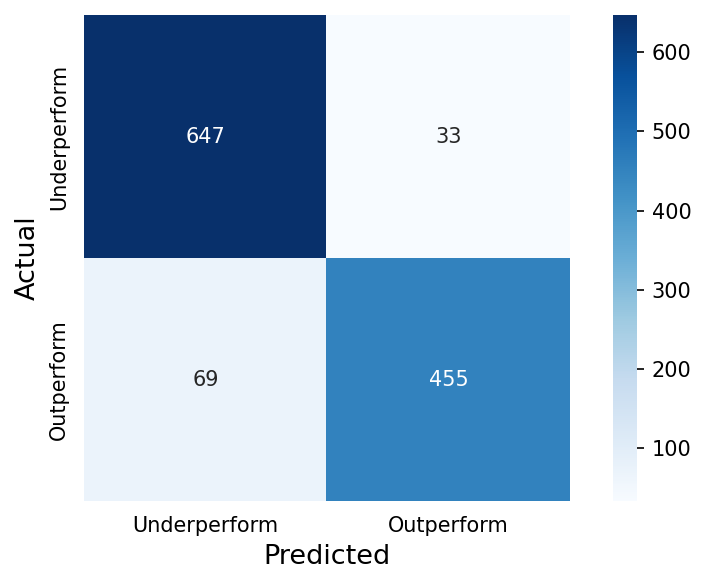

In [448]:
rfc_confusion = confusion_matrix(y3_test,pred3_rfc)
plt.figure(dpi=150)
hm = sns.heatmap(rfc_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='g')
hm.set_xticklabels(labels=['Underperform','Outperform'], rotation=0)
hm.set_yticklabels(labels=['Underperform','Outperform'], rotation=90, va='center')
hm.tick_params(left=False, bottom=False)

plt.xlabel('Predicted', fontsize=13)
plt.ylabel('Actual', fontsize=13)
plt.tight_layout()
plt.savefig('../Charts/test_confusion_matrix.png')

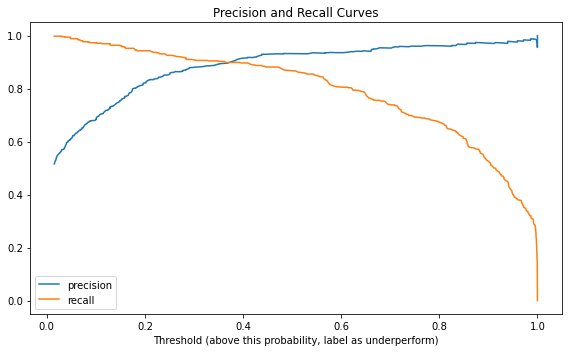

In [419]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

grid_pred_proba_rfc = grid3_rfc.predict_proba(X3_test)[:,1]
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y3_test, grid_pred_proba_rfc)

plt.figure(figsize=(8,5))
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as underperform)');
plt.title('Precision and Recall Curves')
plt.tight_layout()
plt.savefig('../Charts/test_precision_recall_thres.png')

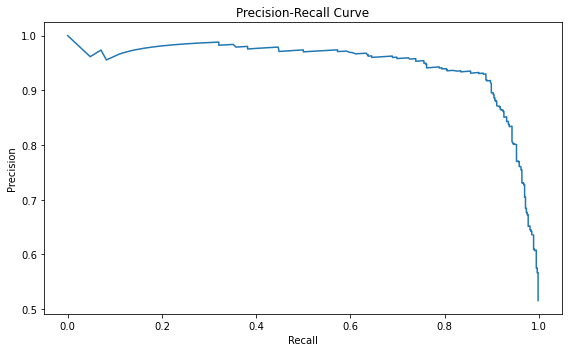

In [420]:
plt.figure(figsize=(8,5))
plt.plot(recall_curve[1:], precision_curve[1:],label='precision')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.tight_layout()
plt.savefig('../Charts/test_precision_recall.png')

In [400]:
fpr, tpr, thresoholds = roc_curve(y3_test, grid_pred_proba_rfc)

ROC AUC score =  0.9622810956443645


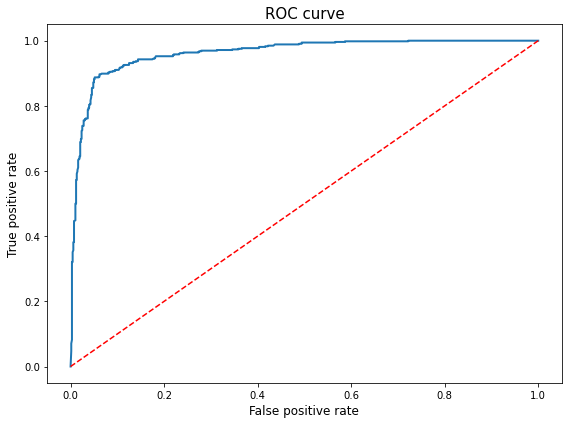

In [424]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='red',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True positive rate', fontsize=12)
plt.title('ROC curve', fontsize=15)
plt.tight_layout()
plt.savefig('../Charts/test_roc_curve.png')

print("ROC AUC score = ", roc_auc_score(y3_test, grid_pred_proba_rfc))

In [422]:
log_loss(y3_test, grid3_rfc.predict_proba(X3_test))

0.27607193366585897

## Interpreting Results

### Feature importance

#### Gini importance (or mean decrease impurity)

In [426]:
rfc3 = RandomForestClassifier(bootstrap=False, max_depth=10, max_features='auto',
                              min_samples_leaf=1, min_samples_split=2, n_estimators=75)

In [430]:
rfc3.fit(X3_train, y3_train)

RandomForestClassifier(bootstrap=False, max_depth=10, n_estimators=75)

Text(0.5, 0, 'Random Forest Feature Importance')

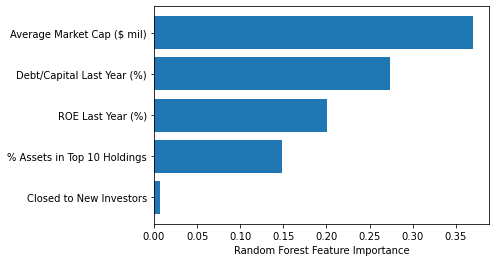

In [439]:
sorted_idx_gini = rfc3.feature_importances_.argsort()
plt.barh(X3_test.columns[sorted_idx_gini], rfc3.feature_importances_[sorted_idx_gini])
plt.xlabel("Random Forest Feature Importance")

#### Permutation importance

Text(0.5, 0, 'Permutation Importance')

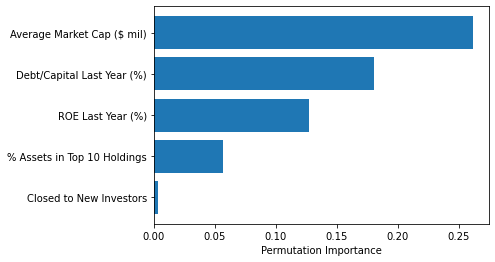

In [440]:
perm_importance = permutation_importance(rfc3, X3_test, y3_test)
sorted_idx_perm = perm_importance.importances_mean.argsort()
plt.barh(X3_test.columns[sorted_idx_perm], perm_importance.importances_mean[sorted_idx_perm])
plt.xlabel("Permutation Importance")

### Error analysis

In [459]:
FN = df3_mf_test[(y3_test == 1) & (pred3_rfc[:].T == 0)]

In [460]:
FP = df3_mf_test[(y3_test == 0) & (pred3_rfc[:].T == 1)]

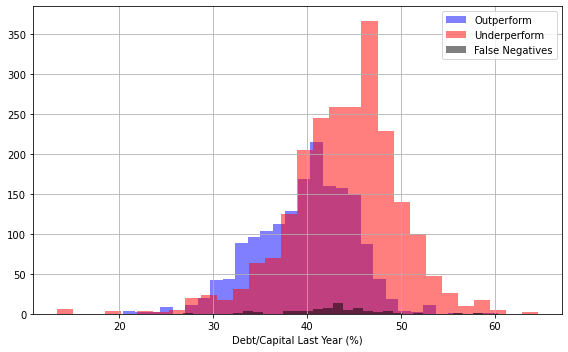

In [474]:
plt.figure(figsize=(8,5))
df3_mf_train[df3_mf_train['Outperform / Underperform']==1]['Debt/Capital Last Year (%)'].hist(alpha=0.5,
                                              color='blue', bins=30,label='Outperform')
df3_mf_train[df3_mf_train['Outperform / Underperform']==0]['Debt/Capital Last Year (%)'].hist(alpha=0.5,
                                              color='red', bins=30,label='Underperform')
FN['Debt/Capital Last Year (%)'].hist(alpha=0.5, color='black', bins=30,label='False Negatives')

plt.legend()
plt.xlabel('Debt/Capital Last Year (%)')
plt.tight_layout()
plt.savefig('../Charts/dist_false_positives.png')

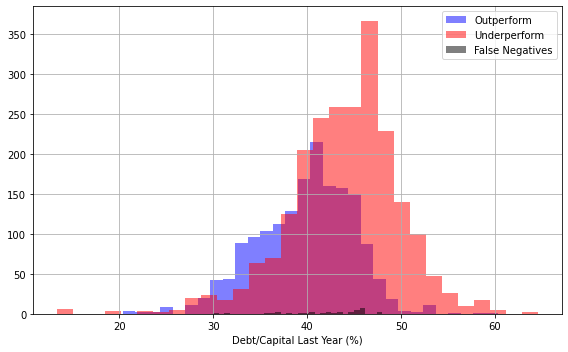

In [473]:
plt.figure(figsize=(8,5))
df3_mf_train[df3_mf_train['Outperform / Underperform']==1]['Debt/Capital Last Year (%)'].hist(alpha=0.5,
                                              color='blue', bins=30,label='Outperform')
df3_mf_train[df3_mf_train['Outperform / Underperform']==0]['Debt/Capital Last Year (%)'].hist(alpha=0.5,
                                              color='red', bins=30,label='Underperform')
FP['Debt/Capital Last Year (%)'].hist(alpha=0.5, color='black', bins=30,label='False Negatives')

plt.legend()
plt.xlabel('Debt/Capital Last Year (%)')
plt.tight_layout()
plt.savefig('../Charts/dist_false_positives.png')